# SkillCorner Off-Ball Run Radars:

This notebook requests player averages within the given season & competition selection for all players that meet the match/minute thresholds. Once the data has been returned you will be able to filter the data & generate player profile plots. See the plot explainer below for an example.

![radar plot explianer](https://github.com/liamMichaelBailey/skillcorner_radar_plots/blob/main/game_intelligence_run_radars.png)

## Common errors:

* Conflicting competition & season selection (e.g selecting ESP LaLiga & BRA Serie A but only selecting season 2022/2023).

## Step 1 - Setup & Requesting Data:

### Initialise the radar tool:
Add your SkillCorner API Credenetials (the same username & password used to access the Web Querey Tool).

In [2]:
# Import the radar tool.
import pandas as pd
from skillcorner_radar_tool import SkillCornerRadarTool

In [3]:
# Initialiset the radar tool with API credentials.
USERNAME = "" # The same email address & password used to access the web querey tool.
PASSWORD = "" 

sc_radar_tool = SkillCornerRadarTool(USERNAME, PASSWORD) # Initialising the radar tool.

### Check competition ids:
The code below rquests competition infromation for those with full coverage. 

In [4]:
# Requesting competitions with full coverage.
competitions_df = sc_radar_tool.get_competitions({'coverage': 'full'}) 
competitions_df = pd.DataFrame(competitions_df)

# Output competitions in ENG, ESP, FRA, GER, & ITA.
competitions_df[competitions_df['area'].isin(['ENG', 'ESP', 'FRA', 'GER', 'ITA'])] 

,id,area,name
18,31,ENG,Championship
19,127,ENG,FA Women`s Super League
20,101,ENG,League One
21,204,ENG,League Two
22,1,ENG,Premier League
23,44,ESP,Copa del Rey
24,4,ESP,LaLiga
25,42,ESP,LaLiga 2
29,3,FRA,Ligue 1
30,12,FRA,Ligue 2


### Request off-ball run per match averages:
Change the cell below to request data for you package of competitions. Cuurently, running the cell will request players with at least 8 matches of 60 minutes in ENG1, ESP1, FRA1, GER1 & ITA1.

Following this request you will be able to quickly generate radars for any player returned from the API.

In [5]:
# Request per match off-ball run data from SkillCorner API.
season_id = 21 # Season 2022/2023.
minutes = 60 # Only consider performances of at least 60 minutes,
matches = 8 # Only conisder player with at least 8 matches.
competition_ids = [1, 3, 4, 5, 6] # ENG Premier League, ESP LaLiga, FRA Ligue 1, GER Bundesliga & ITA Serie A.

# Request per match averages for the selected season & competitions from SkillCorner API.
sc_radar_tool.request_data(season_id, competition_ids, minutes, matches)

Requesting data for competition_id 1...
Success! 167 players returned for competition_id 1
Requesting data for competition_id 3...
Success! 137 players returned for competition_id 3
Requesting data for competition_id 4...
Success! 120 players returned for competition_id 4
Requesting data for competition_id 5...
Success! 147 players returned for competition_id 5
Requesting data for competition_id 6...
Success! 121 players returned for competition_id 6


## Step 2 - Generating Radar Plots:
This section shows how to generate radars from the requested data. 

Change the team name to see which players have met the performance requirments & are available for visualisation.  

In [6]:
# Which player from Manchester City have met the performance requirements.
sc_radar_tool.get_off_ball_run_df()[sc_radar_tool.get_off_ball_run_df()['team_name'] == 'Manchester City'][['player_name',
                                                                                                          'team_name',
                                                                                                          'position', 
                                                                                                          'count_match']]

,player_name,team_name,position,count_match
100,Erling Haland,Manchester City,CF,18
101,Ilkay Gündogan,Manchester City,LM,10
102,Jack Grealish,Manchester City,LF,9
103,Joao Cancelo,Manchester City,LWB,13
104,John Stones,Manchester City,RCB,9
105,Kevin de Bruyne,Manchester City,RM,11
106,Nathan Ake,Manchester City,LCB,8
107,Rodrigo Hernandez,Manchester City,DM,12


To generate a radar for a specific player, four inputs are required:

1. The players name.
2. The team of the player
3. The position of the player.
4. The posiitons we want to compare the player against.

131 players in position selection: LM,RM


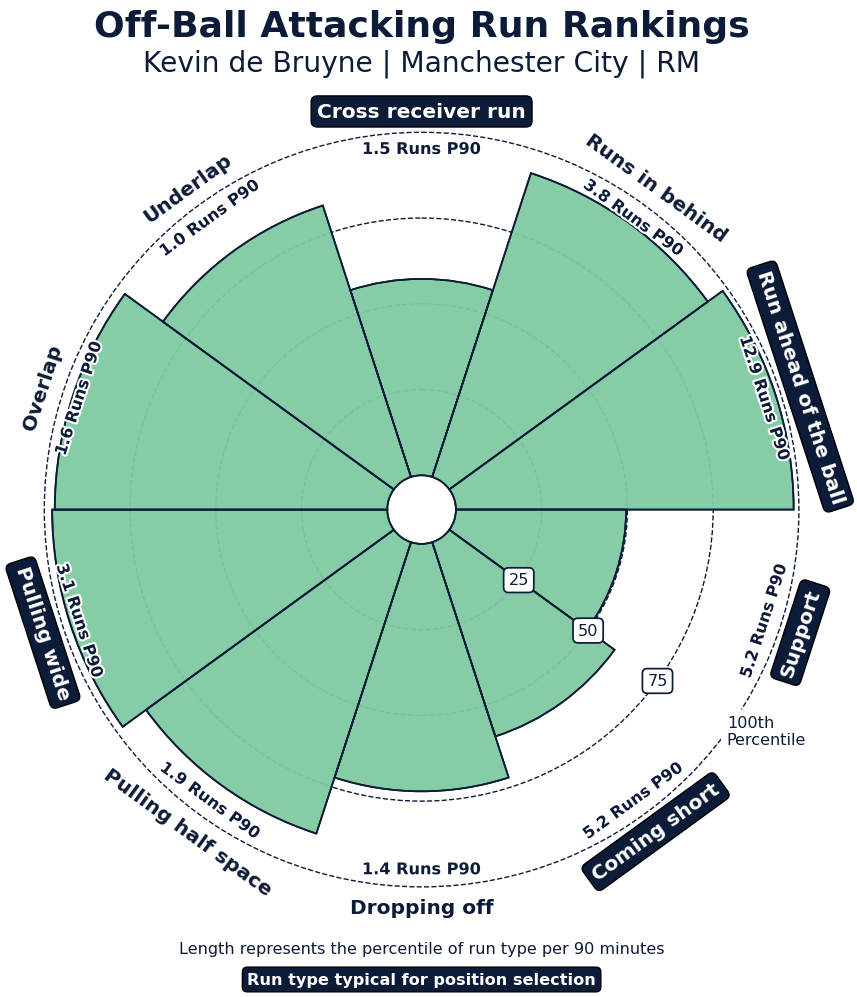

In [7]:
# Player we want to generate radar for.
player_name = 'Kevin de Bruyne' 
# The team of Kevin de Bruyne (some players play for multiple teams in the same season).
team_name = 'Manchester City' 
# Position to compare Kevin de Bruyne in (some players play in multiple positions).
player_posisition = 'RM'
# Positions of players to compare Kevin de Bruyne against. Here we will compare against all forwards
position_to_compare = ['LM', 'RM'] 
# The theme of the plot ('Light' or 'Dark').
theme = 'Light'

# Generate the radar for Kevin de Bruyne as a RM playing for Manchester City.
# Ranking against players who have played LM or RM in the top 5 leagues in season 2022/2023.
fig, ax = sc_radar_tool.rank_players_generate_radar(player_name,
                                                    team_name,
                                                    player_posisition, 
                                                    position_to_compare, 
                                                    theme)